<a href="https://colab.research.google.com/github/kavinaero/PDFreader/blob/master/csvfile2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk

import pandas as pd

In [2]:
from google.colab import files

upload = files.upload()

import io

#"""Reading my file"""

source = pd.read_csv(io.BytesIO(upload['File.csv']))

Data = pd.DataFrame(source['text'])

Data

Saving File.csv to File.csv


,text
0,@desjudicata well then https://t.co/Y6KZOcweMV
1,RT @bertybrates: i lost my smile again but i'm...
2,RT @OurMindsNotURS: Asymptomatic=No symptoms.\...
3,RT @DannyBate4: a handy medievalist's guide to...
4,RT @TheWaleAgbede: You want to be driving your...
5,"RT @lt_freedom: Plagues, Famines, Floods, &amp..."
6,RT @brhodes: Imagine what Republicans would sa...
7,@Fluffn_army Hein ?
8,"The user @cIoutIessm you follow was suspended,..."
9,RT @ComradeMallu: Scenes from Rajamala of Iduk...


In [3]:
Data.drop_duplicates(subset='text')

,text
0,@desjudicata well then https://t.co/Y6KZOcweMV
1,RT @bertybrates: i lost my smile again but i'm...
2,RT @OurMindsNotURS: Asymptomatic=No symptoms.\...
3,RT @DannyBate4: a handy medievalist's guide to...
4,RT @TheWaleAgbede: You want to be driving your...
5,"RT @lt_freedom: Plagues, Famines, Floods, &amp..."
6,RT @brhodes: Imagine what Republicans would sa...
7,@Fluffn_army Hein ?
8,"The user @cIoutIessm you follow was suspended,..."
9,RT @ComradeMallu: Scenes from Rajamala of Iduk...


In [4]:
Data.drop_duplicates(subset='text')

,text
0,@desjudicata well then https://t.co/Y6KZOcweMV
1,RT @bertybrates: i lost my smile again but i'm...
2,RT @OurMindsNotURS: Asymptomatic=No symptoms.\...
3,RT @DannyBate4: a handy medievalist's guide to...
4,RT @TheWaleAgbede: You want to be driving your...
5,"RT @lt_freedom: Plagues, Famines, Floods, &amp..."
6,RT @brhodes: Imagine what Republicans would sa...
7,@Fluffn_army Hein ?
8,"The user @cIoutIessm you follow was suspended,..."
9,RT @ComradeMallu: Scenes from Rajamala of Iduk...


In [6]:
Repeats = Data.groupby(['text']).size().reset_index(name='counts')\
.sort_values('counts',ascending=False).head(10)

print(Repeats)

                                                text  counts
0                                @Fluffn_army Hein ?       1
1  @almaplateada @hachi_08 Like, I will REALLY ke...       1
2  @btsvotingorg If you love these 7 beautiful me...       1
3  @czhoiyeonjun Okay! Hawaiian it is!! :D I'll p...       1
4     @desjudicata well then https://t.co/Y6KZOcweMV       1
5  RT @ComradeMallu: Scenes from Rajamala of Iduk...       1
6  RT @Cryptotvplus: ARE YOU READY?\nIt's just fi...       1
7  RT @DannyBate4: a handy medievalist's guide to...       1
8  RT @OurMindsNotURS: Asymptomatic=No symptoms.\...       1
9  RT @TheWaleAgbede: You want to be driving your...       1


In [7]:
"""#Clean Tweet"""

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stops = ['rt','rts','retweet']
stop_words = set().union(stopwords.words('english'),stops)

print(stop_words)

Data['processed_text'] = Data['text'].str.lower()\
          .str.replace('(@[a-z0-9]+)\w+',' ')\
          .str.replace('(http\S+)', ' ')\
          .str.replace('([^a-z \t])',' ')\
          .str.replace(' +',' ')\
          .apply(lambda x: [i for i in x.split() if not i in stop_words])

print(Data)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{'those', 'shan', 'she', 'now', 'hasn', 'ourselves', "wouldn't", 'can', 'all', 'from', 'hers', 'up', 'mustn', 'during', 'further', 've', 'didn', 'against', 'wouldn', 'will', 'being', 'here', 'having', 'after', 'o', 'nor', 'myself', 'he', 'them', 'll', "needn't", 'yourself', 'until', 'out', 'but', 'most', 'they', 'again', 'by', "wasn't", 'these', 'don', 'just', "you'll", 'doing', 'if', 'while', "haven't", "shan't", 'couldn', 'its', 'off', 'more', 'does', 'were', 'about', "don't", 'only', "hadn't", "mustn't", 'her', 't', "couldn't", "won't", 'or', 'own', 'under', 'are', "doesn't", 'rt', 'that', 'at', 'such', 'ain', 'did', 'why', 's', 'what', 'who', "hasn't", 'isn', 'ours', 'between', "mightn't", 'few', 'herself', 'any', "it's", 'i', 'an', 'too', 'his', 'you', 'with', 'when', 'once', 'this', 'no', 'has', 'retweet', 'we', 're', "didn't", 'which', 'haven', 'rts', 'there', 'was', 't

In [8]:
"""#Hashtag"""

import re
text = Data['processed_text']

def find_hastag(text):
  return re.findall('(#[A-Za-z]+[A-Za-z0-9-]+)',text)

Data['hashtags'] = Data.text.apply(find_hastag)

print(Data)

hashtags = Data['text'].apply(lambda x: pd.value_counts(re.findall('(#\w+)', x.lower() )))\
.sum(axis=0)\
.to_frame()\
.reset_index()\
.sort_values(by=0,ascending=False)

hashtags.columns = ['hastags','occurances']

print(hashtags)

                                                 text  ...             hashtags
0      @desjudicata well then https://t.co/Y6KZOcweMV  ...                   []
1   RT @bertybrates: i lost my smile again but i'm...  ...                   []
2   RT @OurMindsNotURS: Asymptomatic=No symptoms.\...  ...                   []
3   RT @DannyBate4: a handy medievalist's guide to...  ...                   []
4   RT @TheWaleAgbede: You want to be driving your...  ...                   []
5   RT @lt_freedom: Plagues, Famines, Floods, &amp...  ...                   []
6   RT @brhodes: Imagine what Republicans would sa...  ...                   []
7                                 @Fluffn_army Hein ?  ...                   []
8   The user @cIoutIessm you follow was suspended,...  ...                   []
9   RT @ComradeMallu: Scenes from Rajamala of Iduk...  ...    [#KeralaRain2020]
10  RT @diaoln: The perfect DJ doesn't exis- https...  ...                   []
11  RT @haruharu_w_bts: 200807 / 05:41PM

In [9]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

Data['Stemming'] = Data['processed_text'].apply(lambda x: [ps.stem(i) for i in x if 1!=""])

print(Data)


                                                 text  ...                                           Stemming
0      @desjudicata well then https://t.co/Y6KZOcweMV  ...                                             [well]
1   RT @bertybrates: i lost my smile again but i'm...  ...                                [lost, smile, okay]
2   RT @OurMindsNotURS: Asymptomatic=No symptoms.\...  ...  [asymptomat, symptom, symptom, fuck, wrong, co...
3   RT @DannyBate4: a handy medievalist's guide to...  ...  [handi, medievalist, guid, nation, anthem, europ]
4   RT @TheWaleAgbede: You want to be driving your...  ...  [want, drive, car, fuel, price, go, want, take...
5   RT @lt_freedom: Plagues, Famines, Floods, &amp...  ...  [plagu, famin, flood, amp, fire, one, ever, sa...
6   RT @brhodes: Imagine what Republicans would sa...  ...  [imagin, republican, would, say, obama, presid...
7                                 @Fluffn_army Hein ?  ...                                             [hein]
8   The us

In [10]:
from nltk.stem import SnowballStemmer

sb = SnowballStemmer("english")

Data['Sb_Stemming'] = Data['processed_text'].apply(lambda x: [ps.stem(i) for i in x if 1!=""])

print(Data)

                                                 text  ...                                        Sb_Stemming
0      @desjudicata well then https://t.co/Y6KZOcweMV  ...                                             [well]
1   RT @bertybrates: i lost my smile again but i'm...  ...                                [lost, smile, okay]
2   RT @OurMindsNotURS: Asymptomatic=No symptoms.\...  ...  [asymptomat, symptom, symptom, fuck, wrong, co...
3   RT @DannyBate4: a handy medievalist's guide to...  ...  [handi, medievalist, guid, nation, anthem, europ]
4   RT @TheWaleAgbede: You want to be driving your...  ...  [want, drive, car, fuel, price, go, want, take...
5   RT @lt_freedom: Plagues, Famines, Floods, &amp...  ...  [plagu, famin, flood, amp, fire, one, ever, sa...
6   RT @brhodes: Imagine what Republicans would sa...  ...  [imagin, republican, would, say, obama, presid...
7                                 @Fluffn_army Hein ?  ...                                             [hein]
8   The us

In [28]:
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

texts = Data['text']
def lemmatize_sentence(texts):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(texts):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

Data['text_lemmatized'] = Data.processed_text.apply(lemmatize_sentence)


In [29]:
print(Data)

                                                 text  ...                                    text_lemmatized
0      @desjudicata well then https://t.co/Y6KZOcweMV  ...                                             [well]
1   RT @bertybrates: i lost my smile again but i'm...  ...                                [lose, smile, okay]
2   RT @OurMindsNotURS: Asymptomatic=No symptoms.\...  ...  [asymptomatic, symptom, symptom, fuck, wrong, ...
3   RT @DannyBate4: a handy medievalist's guide to...  ...  [handy, medievalist, guide, national, anthem, ...
4   RT @TheWaleAgbede: You want to be driving your...  ...  [want, driving, car, fuel, price, go, want, ta...
5   RT @lt_freedom: Plagues, Famines, Floods, &amp...  ...  [plague, famine, flood, amp, fire, one, ever, ...
6   RT @brhodes: Imagine what Republicans would sa...  ...  [imagine, republican, would, say, obama, presi...
7                                 @Fluffn_army Hein ?  ...                                             [hein]
8   The us

In [19]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [20]:
pip install nlppreprocess

In [24]:
pip install tag

     |████████████████████████████████| 768kB 2.8MB/s 
  Created wheel for tag: filename=tag-0.5-cp36-none-any.whl size=777734 sha256=99eb2797e027fe996271e503c02638d29d90b24d4fd7ea25bec90e4f8cbe759b
  Stored in directory: /root/.cache/pip/wheels/88/74/00/b2e721ccc16ceb4dd44c32ef31842d1e0b2e89e4fce7eaf06a
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26102 sha256=d5c3a7f374e100b2e629d39a80d7d6a186854e9c63ae0b389060175e61b57885
  Stored in directory: /root/.cache/pip/wheels/f3/f2/66/e9c30d3e9499e65ea2fa0d07c002e64de63bd0adaa49c445bf
Successfully built tag intervaltree
  Found existing installation: intervaltree 2.1.0
    Uninstalling intervaltree-2.1.0:
      Successfully uninstalled intervaltree-2.1.0


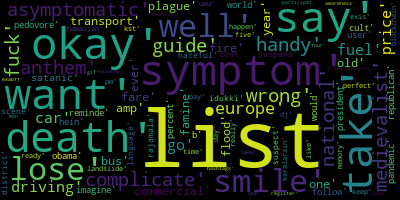

In [30]:
"""#Visualization"""

from wordcloud import WordCloud
words = Data['text_lemmatized'].values
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=5, contour_color='steelblue')
# Generate a word cloud
wordcloud = WordCloud().generate(str(words))
#plt.imshow(wordcloud)
#plt.axis("off")
#plt.show()
# Visualize the word cloud
wordcloud.to_image()